# Credit Risk Classification
---

## Overview of the Analysis
### Purpose
In this analysis, we look at the ability of different machine learning (ML) models to classify healthy and high-risk loans.

### About the data
* Explain what financial information the data was on, and what you needed to predict.
* Provide basic information about the variables you were trying to predict (e.g., `value_counts`).


### Methods used
The following models form the `sklearn` library are evaluated:
* `LogisticRegression` with original data (Model 1) and scaled data (Model 2)
* `SVC` with scaled data (Model 3)
* `tree` with scaled data (Model 4)
* `RandomForest` with scaled data (Model 5)
* `KNeighborsClassifier` with scaled data (Model 6)

Note that PCA is not used as the number of features (dimensions) is reasonable and we do not expect any significant improvement by using Principal Components.

### Stages
We prepare the data for all the models in the next sections by performing the following steps:
* Import all necessary modules (there are no imports within the other code blocks)
* Load the data from the CSV file into a pandas DataFrame
* Split the data between the training and test sets using `train_test_split` from `sklearn`

For each of the models, we then perform the following steps
* Scaling (optional)
* Fitting (i.e. train the model with the training set)
* Predictions (i.e. use the test set )
* Describe the stages of the machine learning process you went through as part of this analysis.

## Preparation

### Dependencies

In [89]:
# Ignore all warnings
from warnings import simplefilter
simplefilter(action='ignore')

# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Import the models from SKLearn (Model 1 through Model 6)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Local module
from ml_classification import model_performance

### Load data

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
csv = Path('Resources/lending_data.csv')
df = pd.read_csv(csv)

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
# Review the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
# Review the "loan_status" information
loan_status_df = df['loan_status'].value_counts()
loan_status_df.index = ['Healthy (0)', 'High Risk (1)']
display(loan_status_df)

Healthy (0)      75036
High Risk (1)     2500
Name: loan_status, dtype: int64

### Split data between Training and Test sets
We create the labels set (`y`) from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns. We then split the data into training and testing datasets by using `train_test_split`.

In [5]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns='loan_status')

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,stratify=y)

---
## Model 1: Logistic Regression Model with the Original Data

### Fitting
Logistic regression model, using the training data (`X_train` and `y_train`).

In [6]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model_1 = LogisticRegression(solver='lbfgs', random_state=1, max_iter=100)

# Fit the model using training data
model_1 = model_1.fit(X_train, y_train)

# Score the model
print(f"Training Data Score: {model_1.score(X_train, y_train)}")
print(f"Testing Data Score: {model_1.score(X_test, y_test)}")

Training Data Score: 0.9914878250103177
Testing Data Score: 0.9924164259182832


### Predictions

In [7]:
# Make a prediction using the testing data
print('---')
print("Predictions vs Actual classification:")
predictions_1 = model_1.predict(X_test)
classification_df = pd.DataFrame({'Prediction': predictions_1, "Actual": y_test})
classification_df.head()

---
Predictions vs Actual classification:


,Prediction,Actual
36831,0,0
75818,0,1
36563,0,0
13237,0,0
43292,0,0


### Performance

In [8]:
model_1_metrics = model_performance(y_test, predictions_1, True)

for key in model_1_metrics.keys():
    print(f"{key}: {model_1_metrics[key]:.2f}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        18679           80
Actual 1           67          558
---
Accuracy Score : 0.9924164259182832
---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384

accuracy: 0.99
precision_0: 1.00
precision_1: 0.87
recall_0: 1.00
recall_1: 0.89


### Conclusions for Model 1
#### Observations
- The precision for Class 0 is excellent (only 67 mistakes over more than 18k data points)
- In other word, the ratio of false negatives over true positive is very small
- The precision and recall for Class 1 is not as good (around 88%)
- In other word, this model has a (very) small tendency to produce false positives (Type I error)

#### Recommendations
**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

A value of 0 in the “loan_status” column means that the loan is healthy. A value of 1 means that the loan has a high risk of defaulting. A Type I error therefore means that a loan can be predicted as "healthy" when it is in fact "risky."

This is not in the favour of the creditor and a more conservative model (perhaps with a higher tendency for Type II errors but that creates fewer Type I errors) may be preferred. The model still shows very good performance and can be recommeded for the application but getting the Class 1 precision and recall closer to 95% could be preferrable for creditors who want to avoid exposing themselves to more risk than expected.

---
## Model 2: Logistic Regression Model with the Scaled Data

### Data scaling (`X` only)
The scaled data are saved in two variables: `X_train_scaled` and `X_test_scaled`

In [9]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fitting, Predictions, and Performance

In [10]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model_2 = LogisticRegression(solver='lbfgs', random_state=1, max_iter=100)

# Fit the model using training data
model_2 = model_2.fit(X_train_scaled, y_train)

# Make a prediction using the testing data
predictions_2 = model_2.predict(X_test_scaled)

# Model performance
model_2_metrics = model_performance(y_test, predictions_2, True)

for key in model_2_metrics.keys():
    print(f"{key}: {model_2_metrics[key]:.2f}")


Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        18669           90
Actual 1           12          613
---
Accuracy Score : 0.9947379281881964
---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384

accuracy: 0.99
precision_0: 1.00
precision_1: 0.87
recall_0: 1.00
recall_1: 0.98


---
## Model 3: SVM with the Scaled Data

In [11]:
# Create a support vector machine linear classifer, and fit it to the training data
model_3 = SVC(kernel='linear')
model_3.fit(X_train_scaled, y_train)

# Print the model score by using the test data
print(f"Test accuracy: {model_3.score(X_test_scaled, y_test):.3f}")

# Calculate the classification report
predictions_3 = model_3.predict(X_test_scaled)

# Model performance
model_3_metrics = model_performance(y_test, predictions_3, True)

for key in model_3_metrics.keys():
    print(f"{key}: {model_3_metrics[key]:.2f}")

Test accuracy: 0.995
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        18669           90
Actual 1           12          613
---
Accuracy Score : 0.9947379281881964
---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384

accuracy: 0.99
precision_0: 1.00
precision_1: 0.87
recall_0: 1.00
recall_1: 0.98


---
## Model 4: Decision Tree with the Scaled Data
A maximum depth of `3` is used. Please refer to `models_optimisation.ipynb` for more details on how this value was chosen.

In [81]:
# Creating the decision tree classifier instance
depth = 3
model_4 = DecisionTreeClassifier(max_depth=depth)

# Fitting the model
model_4 = model_4.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions_4 = model_4.predict(X_test_scaled)

# Model performance
model_4_metrics = model_performance(y_test, predictions_4, True)

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        18669           90
Actual 1            3          622
---
Accuracy Score : 0.9952022286421791
---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      1.00      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      1.00      0.96     19384
weighted avg       1.00      1.00      1.00     19384



---
## Model 5: Random Forest with the Scaled Data

In [13]:
# Create a random forest classifier
model_5 = RandomForestClassifier(n_estimators=500, random_state=1)

# Fitting the model
model_5 = model_5.fit(X_train_scaled, y_train)

# Making predictions
predictions_5 = model_5.predict(X_test_scaled)

# Model performance
model_5_metrics = model_performance(y_test, predictions_5, True)

for key in model_5_metrics.keys():
    print(f"{key}: {model_5_metrics[key]:.2f}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        18680           79
Actual 1           72          553
---
Accuracy Score : 0.9922100701609575
---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.88      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384

accuracy: 0.99
precision_0: 1.00
precision_1: 0.88
recall_0: 1.00
recall_1: 0.88


---
## Model 6: K-nearest neighbours with the Scaled Data

In [14]:
# Instantiate the model
model_6 = KNeighborsClassifier(n_neighbors=4)

# Train the model
model_6.fit(X_train_scaled,y_train)

# Create predictions
predictions_6 = model_6.predict(X_test_scaled)

# Model performance
model_6_metrics = model_performance(y_test, predictions_6, True)

for key in model_6_metrics.keys():
    print(f"{key}: {model_6_metrics[key]:.2f}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        18681           78
Actual 1           73          552
---
Accuracy Score : 0.9922100701609575
---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.88      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384

accuracy: 0.99
precision_0: 1.00
precision_1: 0.88
recall_0: 1.00
recall_1: 0.88


## Conclusions
### Compare all models

In [83]:
models_dicts = [
    model_1_metrics,
    model_2_metrics,
    model_3_metrics,
    model_4_metrics,
    model_5_metrics,
    model_6_metrics]

models_df = pd.DataFrame(models_dicts)

models_df.index = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
models_df['Model'] = ['LogisticRegression', 'LogisticRegression', 'SVC', f"DecisionTreeClassifier (max_depth = {depth})", 'RandomForestClassifier', 'KNeighborsClassifier']
models_df['Data'] = ['Original', 'Scaled', 'Scaled', 'Scaled', 'Scaled', 'Scaled']


models_df = models_df[['Model', 'Data', 'accuracy', 'precision_0', 'precision_1', 'recall_0', 'recall_1']]

# Sort model by recall of class 1
models_df = models_df.sort_values('recall_1', ascending=False)
display(models_df)



,Model,Data,accuracy,precision_0,precision_1,recall_0,recall_1
Model 4,DecisionTreeClassifier (max_depth = 3),Scaled,0.995202,0.999839,0.873596,0.995202,0.9952
Model 2,LogisticRegression,Scaled,0.994738,0.999358,0.871977,0.995202,0.9808
Model 3,SVC,Scaled,0.994738,0.999358,0.871977,0.995202,0.9808
Model 1,LogisticRegression,Original,0.992416,0.996426,0.874608,0.995735,0.8928
Model 5,RandomForestClassifier,Scaled,0.992210,0.996160,0.875000,0.995789,0.8848
Model 6,KNeighborsClassifier,Scaled,0.992210,0.996107,0.876190,0.995842,0.8832


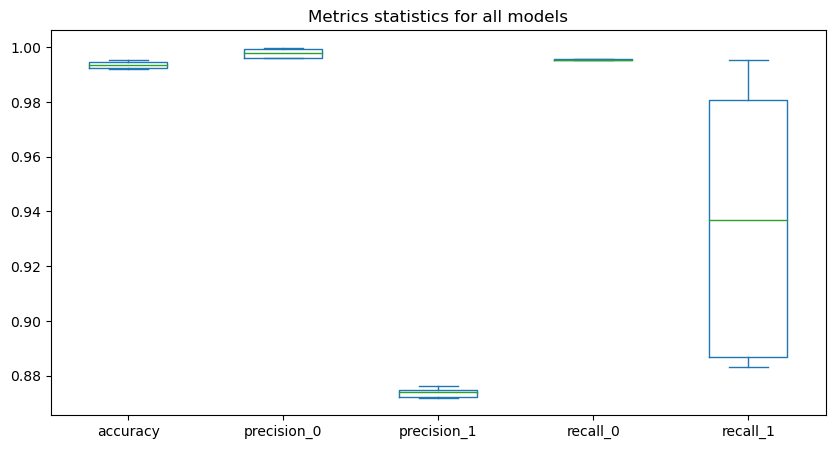

,accuracy,precision_0,precision_1,recall_0,recall_1
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.993586,0.997875,0.873891,0.995495,0.936267
std,0.001444,0.001812,0.001700,0.000323,0.054395
min,0.992210,0.996107,0.871977,0.995202,0.883200
25%,0.992262,0.996227,0.872382,0.995202,0.886800
50%,0.993577,0.997892,0.874102,0.995469,0.936800
75%,0.994738,0.999358,0.874902,0.995775,0.980800
max,0.995202,0.999839,0.876190,0.995842,0.995200


In [90]:
models_df.plot.box(figsize=(10,5), title='Metrics statistics for all models')
plt.show()
models_df.describe()

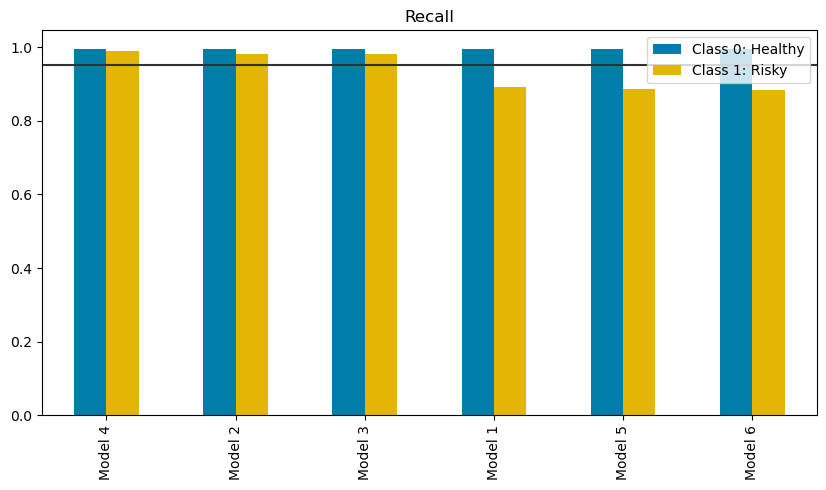

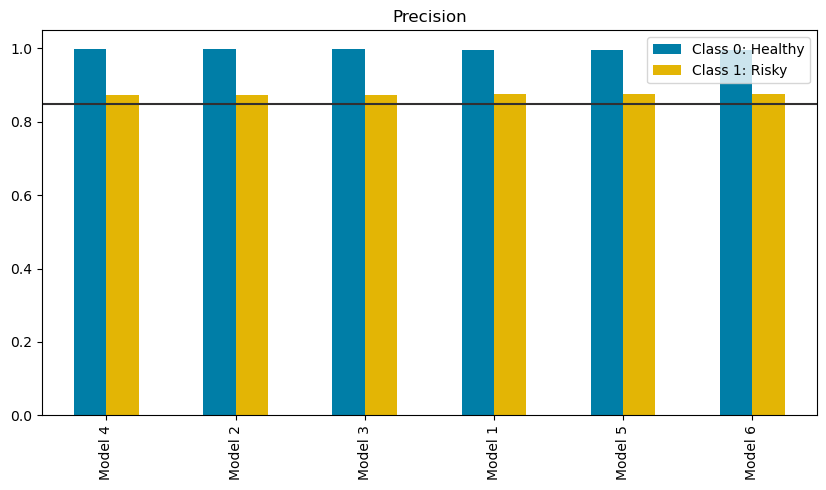

In [77]:
# Define colors
blue = '#007EA7'
orange = '#E3B505'
grey = '#323031'

models_df.plot.bar(y = ['recall_0','recall_1'], figsize=(10,5), legend=True, title = 'Recall', color=[blue, orange])
plt.legend(['Class 0: Healthy', 'Class 1: Risky'])
plt.hlines(0.95,-0.5,5.5,grey)
plt.show()

models_df.plot.bar(y = ['precision_0','precision_1'], figsize=(10,5), legend=True, title = 'Precision', color=[blue, orange])
plt.legend(['Class 0: Healthy', 'Class 1: Risky'])
plt.hlines(0.85,-0.5,5.5,grey)
plt.show()

### Recommendations
While all the models perform well with all metrics above 0.8 and usually close to 0.9, the Decision Tree Classifier offers oustanding performance when it comes to recall (ability to correctly classify risky loans as such) and therefore can be trusted by lenders who want to avoid unexpected risks.

Class-1 recall is by far the most variable metrics among the different metrics (accuracy, precision, recall.) Optimising for Class-1 recall will therefore have very limited impact on the other metrics and can be treated as a one-dimension optimisation problem.